In [131]:
#Importing necessary libraries
import pandas as pd
import numpy as np

# Matplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Cell-to-cell script
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import scipy.stats as st

In [132]:
#Get the data
df_features = pd.read_csv('data_features.csv') 
df_label=pd.read_csv('data_labels.csv')

In [133]:
#By default not all the columns are display. We want to see them all 
pd.set_option('max_columns', None)

In [134]:
df = pd.merge(df_features,df_label,on='id')
df.shape
df.head(2)

(59400, 41)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [135]:
#Split numerical and categorical values
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(np.object)

### Numericals

In [136]:
df_num

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [137]:
df_num.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [138]:
df_num['years_since_construction'] =  np.where(df_num['construction_year']!= 0 , 2021-(df_num['construction_year']),0)
df_num[['years_since_construction']]

C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,years_since_construction
0,22
1,11
2,12
3,35
4,0
...,...
59395,22
59396,25
59397,0
59398,0


In [139]:
#let´s check the total of values=0 in each row
df_num.apply(lambda column:(column == 0).sum())

id                              1
amount_tsh                  41639
gps_height                  20438
longitude                    1812
latitude                        0
num_private                 58643
region_code                     0
district_code                  23
population                  21381
construction_year           20709
years_since_construction    20709
dtype: int64

In [140]:
#drop column num_private
df_num = df_num.drop(['num_private'], axis=1)

In [141]:
#drop rows with longitud = o

In [142]:
df_num = df_num.drop(df_num[df_num['longitude']==0].index,axis=0) # with the index your selecting the 
#exactly values of 'population'=0
df_num = df_num.reset_index(drop=True)# reset the index
df_num.shape

(57588, 10)

In [143]:
df_num.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'construction_year',
       'years_since_construction'],
      dtype='object')

### Categoricals

In [144]:
df_cat

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,VWC,NaN,False,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,VWC,NaN,True,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [145]:
df_cat.columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [146]:
#drop column num_private
df_cat = df_cat.drop(['date_recorded','wpt_name', 'recorded_by','extraction_type','extraction_type_group', 'management',
'payment_type','quality_group', 'quantity_group', 'source_type','waterpoint_type'], axis=1)

In [147]:
df_cat.columns

Index(['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type_class', 'management_group', 'payment', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [148]:
df_cat['payment'].value_counts().nunique

<bound method IndexOpsMixin.nunique of never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64>

In [149]:
df_cat['payment'] = df_cat['payment'].str.replace('other','unknown')

In [150]:
df_cat['payment'].value_counts().nunique

<bound method IndexOpsMixin.nunique of never pay                25348
unknown                   9211
pay per bucket            8985
pay monthly               8300
pay when scheme fails     3914
pay annually              3642
Name: payment, dtype: int64>

In [151]:
df_cat['source'].value_counts().nunique

<bound method IndexOpsMixin.nunique of spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64>

In [152]:
df_cat['source'] = df_cat['source'].str.replace('unknown','other')

In [153]:
df_cat['source'].value_counts().nunique

<bound method IndexOpsMixin.nunique of spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     278
Name: source, dtype: int64>

In [154]:
df_cat.isnull().sum()

funder                    3635
installer                 3655
basin                        0
subvillage                 371
region                       0
lga                          0
ward                         0
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
extraction_type_class        0
management_group             0
payment                      0
water_quality                0
quantity                     0
source                       0
source_class                 0
waterpoint_type_group        0
status_group                 0
dtype: int64

In [155]:
#dealing with NAN
#deleting scheme_name
df_cat = df_cat.drop(['scheme_name'], axis=1)

In [156]:
#Filling Nan

In [158]:
#Filling NaN values with 'something'...for categorical values 

df_cat['funder'] = df_cat['funder'].fillna('Unknown')

In [159]:
df_cat['installer'] = df_cat['installer'].fillna('Unknown')

In [160]:
df_cat['subvillage'] = df_cat['subvillage'].fillna('other')

In [161]:
df_cat['public_meeting'] = df_cat['public_meeting'].fillna('other')

In [162]:
df_cat['scheme_management'] = df_cat['scheme_management'].fillna('Other')

In [163]:
df_cat['permit'] = df_cat['permit'].fillna('Unknown')

In [164]:
df_cat.isnull().sum()

funder                   0
installer                0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

In [165]:
df_tableau = pd.concat([df_num, df_cat], axis=1)
df_tableau.shape
df_tableau.head()

(59400, 29)

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,years_since_construction,funder,installer,basin,subvillage,region,lga,ward,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type_group,status_group
0,69572.0,6000.0,1390.0,34.938093,-9.856322,11.0,5.0,109.0,1999.0,22.0,Roman,Roman,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,VWC,False,gravity,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional
1,8776.0,0.0,1399.0,34.698766,-2.147466,20.0,2.0,280.0,2010.0,11.0,Grumeti,GRUMETI,Lake Victoria,Nyamara,Mara,Serengeti,Natta,other,Other,True,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310.0,25.0,686.0,37.460664,-3.821329,21.0,4.0,250.0,2009.0,12.0,Lottery Club,World vision,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,VWC,True,gravity,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe,functional
3,67743.0,0.0,263.0,38.486161,-11.155298,90.0,63.0,58.0,1986.0,35.0,Unicef,UNICEF,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,VWC,True,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe,non functional
4,19728.0,0.0,0.0,31.130847,-1.825359,18.0,1.0,0.0,0.0,0.0,Action In A,Artisan,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,Other,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [1]:
#Exporting data for the analysis in Tableau

In [167]:
df_tableau.to_excel('WP_tableau.xlsx', index = False)

In [168]:
# Matplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

<AxesSubplot:xlabel='status_group', ylabel='count'>

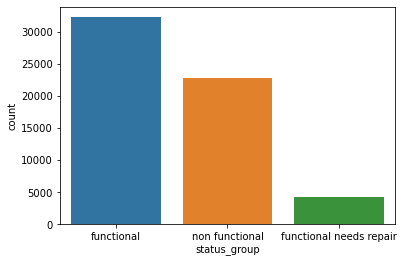

In [170]:
#Categorical
sns.countplot(x='status_group', data=df_tableau)
plt.show()
#Functional vs NonFunctional+Needs_Repair is balance.

In [175]:
#Which is the amount of population affected with Non_functional or Nedd_repair Water_Points
df_tableau.pivot_table(index= ['status_group'], values = ['population'], aggfunc = ['sum'])

,sum
,population
status_group,
functional,5756395.0
functional needs repair,740072.0
non functional,4190186.0


In [176]:
df_tableau['population'].sum()

10686653.0

In [ ]:
#Data Visualisation and analysis made Tableau. 
#You can see the analysis in the p'Water_Project_Final_Report'included in the repository